# Analisis Penyelenggaran 10 Olimpiade Musim Panas Terakhir

### Disusun oleh : Igor Muhammad Farhan
_______________________________________________________________________________________________________________________________

Dataset yang digunakan berasal dari Kaggle yang dapat diunduh <a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results">disini</a> data tersebut memuat 120 tahun penyelenggaraan olimpiade, baik musim panas maupun musim dingin, untuk projek ini akan dibatasi pada penyelenggaraan <b>Olimpiade Musim Panas Rio 2016</b>, kemudian akan di merge dengan dataset <a href="https://www.kaggle.com/resulcaliskan/countries-gdps">GDP negara</a> agar mendapatkan insight yang lebih menarik :)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png" alt="Italian Trulli" width="500" height="600">

## Mengimpor library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from pandas.plotting import scatter_matrix
import seaborn as sns

## Mengimpor data set

In [2]:
olympics = pd.read_csv('athlete_events.csv')

olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Mengeksplorasi data

1. Melihat informasi pada dataset<br>
Didapatkan bahwa dataset terdiri dari 271116 records dan terdapat 15 kolom

In [3]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


2. Mencari value yang yang tidak ada

In [4]:
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


Dapat dilihat bahwa Age, Height, Weight memiliki value yang tidak ada paling banyak. Untuk Medal terdapat 231333 data NaN, namun ini dapat diartikan bahwa tidak semua peserta mendapatkan medali, oleh karena itu data ini akan diganti dengan value 'No Medal'

In [5]:
olympics['Medal'].fillna('No Medal', inplace = True)
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


# Menggabungkan data


1.  Merge dengan data NOC (National Olympic Committee)<br>
NOC merupakan komite nasional yang bertanggungjawab terhadap partisipan di negaranya. Apakah NOC terhubung dengan 
unique team? Kita akan cari tahu dengan menghitung unique subset pada kolom NOC dan Team dan menghitung jumlahnya

In [6]:
print(olympics.loc[:,['NOC','Team']].drop_duplicates()['NOC'].
      value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


Terlihat aneh bukan, mengapa FRA memiliki team lebih dari 160? Terlihat tidak masuk akal bukan? Oleh karena itu perlu di mapping dengan dataset NOC

data NOC memiliki kode NOC dan berkoresponding dengan Nama Negara, berikut adalah lima data pertamanya

In [7]:
regions = pd.read_csv('noc_regions.csv')
regions.drop('notes', axis=1, inplace=True)
regions.rename(columns = {'region':'Country'}, inplace=True)

regions.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


Selanjutnya dataset Olimpiade akan di merge dengan dataset NOC. kolom NOC akan digunakan sebagai primary key. Merge akan dilakukan dengan left join karena diinginkan semua partisipan negara yang tidak ada kode NOC nya tetap ada. Data tersebut akan dikoreksi secara manual.

In [8]:
olympics_merge = olympics.merge(regions, 
                                left_on = 'NOC', 
                                right_on = 'NOC',
                                how = 'left')

olympics_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


Selanjutnya akan dicari data yang belum memiliki value Negara setelah di merge

In [9]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


Lalu akan dimasukkan value ke Country secara manual, dengan ketentuan berikut
1. SGP - Singapore
2. ROT - Refugee Olympic Athletes
3. UNK - Unknown
4. TUV - Tuvalu


In [10]:
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

olympics_merge.drop('Team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'Country': 'Team'}, inplace = True)

2. Merge dengan data GDP (Gross Domestic Product)<br>
dataset ini akan digunakan untuk mengetahui apakah ada pengaruh besarnya GDP terhadap perolehan medali. 

In [11]:
gdp_negara = pd.read_excel('world_gdp.xls')

# Membuang kolom yang tidak dibutuhkan
gdp_negara.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

#mengubah dataframe tersebut menjadi single kolom untuk tahun agar lebih efisien
gdp_negara = pd.melt(gdp_negara, id_vars = ['Country Name', 'Country Code'],
                var_name = 'Tahun', value_name = 'GDP')

# mengubah kolom Tahun menjadi numerik
gdp_negara['Tahun'] = pd.to_numeric(gdp_negara['Tahun'])

gdp_negara.head()


,Country Name,Country Code,Tahun,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [12]:
# Merge country code terlebih dahulu
olympics_merge_gdp = olympics_merge.merge(gdp_negara[['Country Name', 'Country Code']].drop_duplicates(),
                                         left_on = 'Team',
                                         right_on = 'Country Name',
                                         how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace=True)

# Selanjutnya merge GDP
olympics_merge_gdp = olympics_merge_gdp.merge(gdp_negara,
                                         left_on = ['Country Code', 'Year'],
                                         right_on = ['Country Code', 'Tahun'],
                                         how = 'left')

olympics_merge_gdp.drop(['Country Name', 'Tahun'], axis = 1, inplace=True)

In [13]:
olympics_merge_gdp.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,CHN,4.269157e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,CHN,8.560547e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,DNK,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NLD,2.585678e+11


# Memfilter data

 Project ini akan dibatasi pada penyelenggaraan <b>Olimpiade Musim Panas Rio 2016</b>

In [14]:
olympic_Rio = olympics_merge_gdp.loc[(olympics_merge_gdp['Year'] == 2016), :]

olympic_Rio = olympic_Rio.reset_index()
olympic_Rio.drop('index', axis = 1, inplace=True)
olympic_Rio.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP
0,22,Andreea Aanei,F,22.0,170.0,125.0,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,No Medal,Romania,ROU,1.875920e+11
1,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,No Medal,Spain,ESP,1.237255e+12
2,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,No Medal,Spain,ESP,1.237255e+12
3,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,No Medal,Spain,ESP,1.237255e+12
4,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,No Medal,Spain,ESP,1.237255e+12


Selanjutnya, menghitung jumlah total perolehan medali, baik Emas, Perak, maupun Perunggu. Pertama, membuat kolom baru
yang berisi apakah Tim mendapatkan medali atau tidak, jika iya maka 1 jika tidak maka 0

In [15]:
olympic_Rio['Medali'] = np.where(olympic_Rio.loc[:,'Medal'] == 'No Medal', 0, 1)

olympic_Rio.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Medali
0,22,Andreea Aanei,F,22.0,170.0,125.0,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,No Medal,Romania,ROU,1.875920e+11,0
1,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,No Medal,Spain,ESP,1.237255e+12,0
2,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,No Medal,Spain,ESP,1.237255e+12,0
3,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,No Medal,Spain,ESP,1.237255e+12,0
4,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,No Medal,Spain,ESP,1.237255e+12,0


# Menghitung jumlah atlit dan perolehan medali setiap negara

Dalam Olimpiade ini setiap peserta dapat mengikuti lebih dari satu cabang olahraga, oleh karena itu data atlit yang mengikuti lebih dari satu cabang olahraga perlu di drop terlebih dahulu sebelum menghitung jumlah atlit setiap negara

In [16]:
olympic_Rio_Atlit = olympic_Rio.drop_duplicates(subset = 'Name')

olympic_Rio_Atlit = olympic_Rio_Atlit.groupby(['Team']).size().reset_index(name= 'Atlit').sort_values(by=['Atlit'],
                                                                                                      ascending=False)
olympic_Rio_Atlit.head()

,Team,Atlit
192,USA,555
26,Brazil,462
39,China,427
10,Australia,420
66,Germany,417


Selanjutnya menghitung jumlah medali yang didapatkan, perlu diketahui bahwa juara cabang olahraga beregu dihitung hanya mendapatkan 1 medali, oleh karena itu perlu mengetahui cabang olahraga mana saja yang beregu dan individu kemudian mengetahui jumlah medalinya

In [17]:
olympic_Rio_Medali = olympic_Rio[['Team','Event','Medali']].drop_duplicates(subset=['Team', 'Event'])

olympic_Rio_Medali.drop(olympic_Rio_Medali[olympic_Rio_Medali['Medali']==0].index, inplace=True)

olympic_Rio_Medali = olympic_Rio_Medali.groupby(['Team']).size().reset_index(name='Medali').sort_values(by=['Medali'],
                                                                                                       ascending=False)
olympic_Rio_Medali.head()

,Team,Medali
77,USA,79
76,UK,49
12,China,48
61,Russia,46
39,Japan,36


Selanjutnya merge data atlit, medali, dan GDP

In [18]:
Rio_Atlit_Medali = olympic_Rio_Atlit.merge(olympic_Rio_Medali, 
                                left_on = 'Team', 
                                right_on = 'Team',
                                how = 'left')



Rio_Atlit_Medali_GDP = Rio_Atlit_Medali.merge(olympic_Rio[['Team','GDP']], 
                                left_on = 'Team', 
                                right_on = 'Team',
                                how = 'left').drop_duplicates()

Rio_Atlit_Medali_GDP.iloc[200:250,:]

,Team,Atlit,Medali,GDP
13678,Chad,2,NaN,9.600761e+09
13680,Nauru,2,NaN,1.020601e+08
13682,Dominica,2,NaN,5.814840e+08
13684,Swaziland,2,NaN,3.720649e+09
13686,Tuvalu,1,NaN,3.421888e+07
13687,Equatorial Guinea,1,NaN,1.068480e+10


Terakhir, mengisi data null dengan 0

In [19]:
Rio_Atlit_Medali_GDP['Medali'].fillna(0, inplace = True)
Rio_Atlit_Medali_GDP['GDP'].fillna(0, inplace = True)

print(Rio_Atlit_Medali_GDP.isnull().sum())

Team      0
Atlit     0
Medali    0
GDP       0
dtype: int64


# Soal 01 - Membuat Scatter Plot

Pada project ini akan dianalisa pengaruh **jumlah Atlit** , dan **jumlah GDP** terhadap **jumlah perolehan medali**

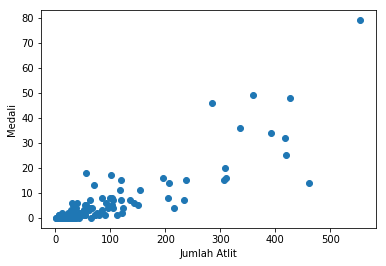

In [20]:
plot.scatter(Rio_Atlit_Medali_GDP['Atlit'], Rio_Atlit_Medali_GDP['Medali'])
plot.xlabel('Jumlah Atlit')
plot.ylabel('Medali')
plot.show()

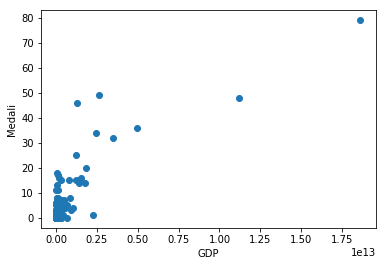

In [21]:
plot.scatter(Rio_Atlit_Medali_GDP['GDP'], Rio_Atlit_Medali_GDP['Medali'])
plot.xlabel('GDP')
plot.ylabel('Medali')
plot.show()

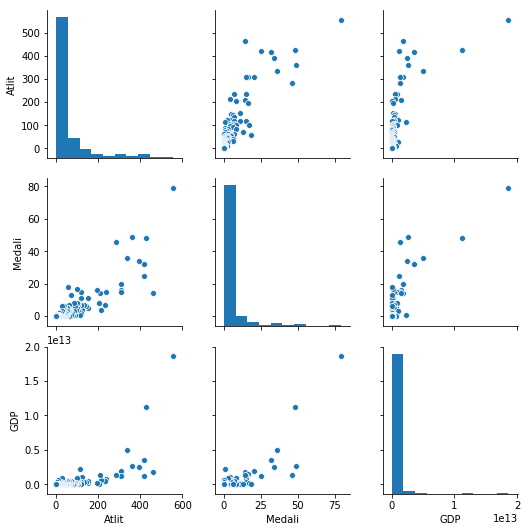

In [22]:
ftr = ['Atlit', 'Medali', 'GDP'] # Memilih fitur

datas = Rio_Atlit_Medali_GDP[ftr]

sns.pairplot(datas)

# Soal 02 - Menduga 2 Features yang Berkorelasi Kuat

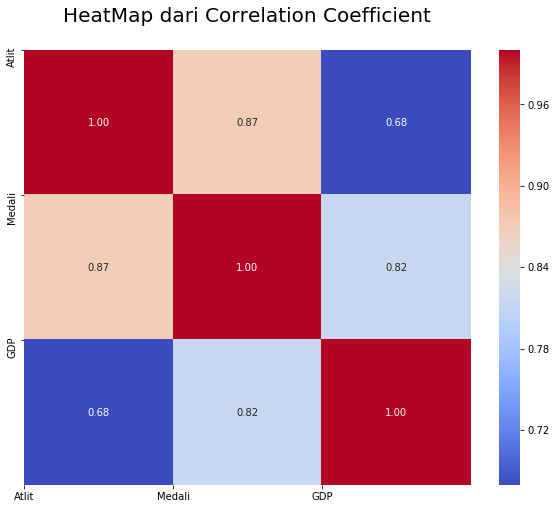

In [23]:
corr = datas.corr()
fig, ax = plot.subplots(figsize=(10, 8)) # Ukuran grafik

# Membuat Heat Map, yang bisa diberi anotasi dan nilai
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plot.xticks(range(len(corr.columns)), corr.columns) # Memberi label X
plot.yticks(range(len(corr.columns)), corr.columns) # Memberi label Y
plot.title("HeatMap dari Correlation Coefficient\n", fontsize= 20)

plot.show()

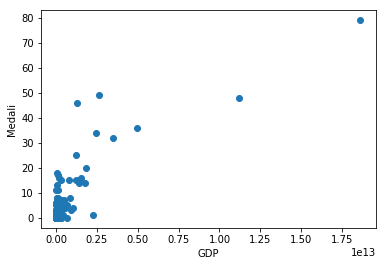

In [24]:
plot.scatter(Rio_Atlit_Medali_GDP['GDP'], Rio_Atlit_Medali_GDP['Medali'])
plot.xlabel('GDP')
plot.ylabel('Medali')
plot.show()

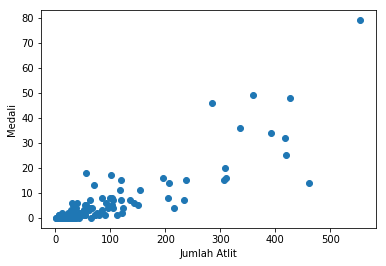

In [25]:
plot.scatter(Rio_Atlit_Medali_GDP['Atlit'], Rio_Atlit_Medali_GDP['Medali'])
plot.xlabel('Jumlah Atlit')
plot.ylabel('Medali')
plot.show()

# Soal 03 - Statistik Deskriptif

In [26]:
Rio_Atlit_Medali_GDP.describe()

,Atlit,Medali,GDP
count,206.000000,206.000000,2.060000e+02
mean,54.242718,3.635922,3.587112e+11
std,95.660218,9.487783,1.598551e+12
min,1.000000,0.000000,0.000000e+00
25%,6.000000,0.000000,2.232310e+09
50%,11.000000,0.000000,1.974288e+10
75%,55.750000,3.000000,1.573998e+11
max,555.000000,79.000000,1.862448e+13


# Soal 04 - Analisis Model Regresi

##  Model Regresi Linier

In [27]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

In [28]:
X = Rio_Atlit_Medali_GDP['Atlit'].values.reshape(-1, 1) 
Y = Rio_Atlit_Medali_GDP['Medali']  
model = LinearRegression() 
model.fit(X, Y) 
y_pred = model.predict(X)

In [29]:
print('intercept', model.intercept_)
print('slope', model.coef_)

intercept -1.0435893136046595
slope [0.08626986]


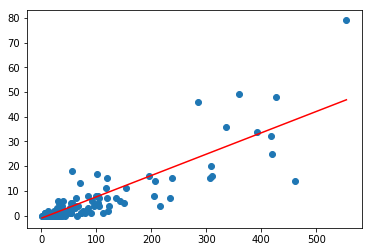

In [30]:
plot.scatter(X, Y)
plot.plot(X, y_pred, color='red')
plot.show()

In [31]:
# evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_x = np.asanyarray(Rio_Atlit_Medali_GDP['Atlit'].values.reshape(-1, 1))
test_y = np.asanyarray(Rio_Atlit_Medali_GDP['Medali'])
test_y2 = model.predict(test_x)

mae = mean_absolute_error(test_y, test_y2)
mse = mean_squared_error(test_y, test_y2)
r2 = r2_score(test_y , test_y2)

print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("R2-score: %.4f" % r2)

hasilRegresi = pd.DataFrame(columns=['linear', 'kuadratik', 'sigmodial','eksponensial'])
hasilRegresi['linear'] = [mae,mse,r2]

Mean absolute error: 2.21
Residual sum of squares (MSE): 21.81
R2-score: 0.7566


## Model Regresi Non-Linier

### 1. Fungsi Polinomial Kuadratik

Fungsi kuadratik didefinisikan sebagai berikut ini: $$ y = ax^2 + bx + c$$ 

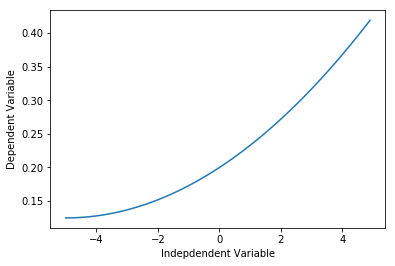

In [32]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 0.003*np.power(X,2) + 0.03*X + 0.2

plot.plot(X,Y) 
plot.ylabel('Dependent Variable')
plot.xlabel('Indepdendent Variable')
plot.show()

In [33]:
def kuadrat(x, a, b, c):
    y = a*np.power(x,2) + b*x + c
    return y

In [34]:
data_x1, data_y1 = (Rio_Atlit_Medali_GDP['Atlit'].values, Rio_Atlit_Medali_GDP['Medali'].values)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(kuadrat, data_x1, data_y1, maxfev = 1000)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1], popt[2]))

 a = 0.000127, b = 0.038000, c = 0.047289


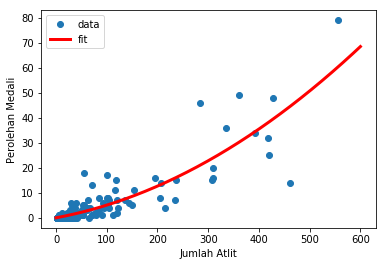

In [35]:
x = np.linspace(0, 600,206)
y = kuadrat(x, *popt)
plot.plot(data_x1, data_y1, 'o', label='data')
plot.plot(x,y,'r', linewidth=3.0, label='fit')
plot.legend(loc='best')
plot.ylabel('Perolehan Medali')
plot.xlabel('Jumlah Atlit')
plot.show()

In [36]:
test1_x = np.asanyarray(Rio_Atlit_Medali_GDP['Atlit'])
test1_y = np.asanyarray(Rio_Atlit_Medali_GDP['Medali'])
test1_y2 = kuadrat(test1_x, *popt)

mae = mean_absolute_error(test1_y, test1_y2)
mse = mean_squared_error(test1_y, test1_y2)
r2 = r2_score(test1_y , test1_y2) 


print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("R2-score: %.4f" % r2 )

hasilRegresi['kuadratik'] = [mae,mse,r2]

Mean absolute error: 1.86
Residual sum of squares (MSE): 18.88
R2-score: 0.7893


### 2. Fungsi Sigmodial 

Fungsi sigmodial didefinisikan sebagai berikut ini: $$ y = \frac{a}{1+e^{-k(x-x_c)}} $$

In [37]:
def sigmo(x, a, k, xc):
    y = a/(1+np.exp(-k*(x-xc)))
    return y

In [38]:
data_x2, data_y2 = (Rio_Atlit_Medali_GDP['Atlit'].values, Rio_Atlit_Medali_GDP['Medali'].values)

popt, pcov = curve_fit(sigmo, data_x2, data_y2, maxfev = 1000)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1], popt[2]))

 a = 78.318050, b = 0.009261, c = 418.177519


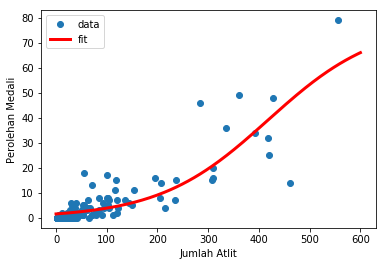

In [39]:
x = np.linspace(0, 600,206)
y = sigmo(x, *popt)
plot.plot(data_x2, data_y2, 'o', label='data')
plot.plot(x,y,'r', linewidth=3.0, label='fit')
plot.legend(loc='best')
plot.ylabel('Perolehan Medali')
plot.xlabel('Jumlah Atlit')
plot.show()

In [40]:
test2_x = np.asanyarray(Rio_Atlit_Medali_GDP['Atlit'])
test2_y = np.asanyarray(Rio_Atlit_Medali_GDP['Medali'])
test2_y2 = sigmo(test2_x, *popt)


mae = mean_absolute_error(test2_y, test2_y2)
mse = mean_squared_error(test2_y, test2_y2)
r2 = r2_score(test2_y , test2_y2)

print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("R2-score: %.4f" % r2)

hasilRegresi['sigmodial'] = [mae,mse,r2]

Mean absolute error: 2.63
Residual sum of squares (MSE): 22.02
R2-score: 0.7541


### 3. Fungsi Ekponensial 

Fungsi ekponensial didefinisikan sebagai berikut ini: $$ y = a + bx + c\rho^x $$

In [41]:
def expo(x, a, b, c, r):
    y = a + b*x + c*np.power(x,r)
    return y

In [42]:
data_x3, data_y3 = (Rio_Atlit_Medali_GDP['Atlit'].values, Rio_Atlit_Medali_GDP['Medali'].values)

popt, pcov = curve_fit(expo, data_x3, data_y3, maxfev = 10000)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1], popt[2]))

 a = 0.548978, b = 112.590365, c = -112.680057


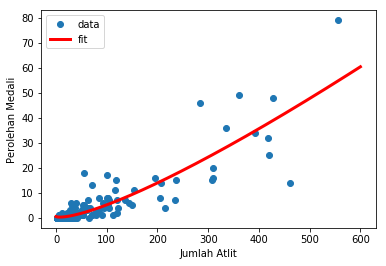

In [43]:
x = np.linspace(0, 600,206)
y = expo(x, *popt)
plot.plot(data_x3, data_y3, 'o', label='data')
plot.plot(x,y,'r', linewidth=3.0, label='fit')
plot.legend(loc='best')
plot.ylabel('Perolehan Medali')
plot.xlabel('Jumlah Atlit')
plot.show()

In [44]:
test3_x = np.asanyarray(Rio_Atlit_Medali_GDP['Atlit'])
test3_y = np.asanyarray(Rio_Atlit_Medali_GDP['Medali'])
test3_y2 = expo(test3_x, *popt)

mae = mean_absolute_error(test3_y, test3_y2)
mse = mean_squared_error(test3_y, test3_y2)
r2 = r2_score(test3_y , test3_y2)

print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("R2-score: %.4f" % r2_score(test3_y , test3_y2))

hasilRegresi['eksponensial'] = [mae,mse,r2]

Mean absolute error: 1.93
Residual sum of squares (MSE): 19.76
R2-score: 0.7794


In [54]:
hasilRegresi.rename(index={0:'MAE',1:'MSE',3:'R2'}, inplace=True)
display(hasilRegresi)

,linear,kuadratik,sigmodial,eksponensial
MAE,2.206517,1.857327,2.630379,1.930583
MSE,21.806348,18.878201,22.024329,19.759159
RMSE,0.756574,0.789261,0.754141,0.779427


Dari pendekatan menggunakan model regresi linier dan berbagai model regresi non-linier. Didapatkan bahwa <b>model regresi non-linier kuadratik</b> merupakan model yang terbaik berdasarkan nilai <b>MAE, MSE, dan R2</b> yaitu, <b>1.857327, 18.878201, 0.789261</b>, secara berurutan.


# Soal 05 - Analisis Klasifikasi

Untuk analisis klasifikasi akan digunakan **K nearest neighbors** untuk memprediksi olahraga yang diikuti atlit menggunakan tinggi dan berat badannya

In [45]:
# Mengetahui cabang olahraga apa saja yang dipertandinkan

olympic_Rio['Sport'].unique()

array(['Weightlifting', 'Gymnastics', 'Athletics', 'Rowing', 'Taekwondo',
       'Handball', 'Boxing', 'Equestrianism', 'Cycling', 'Volleyball',
       'Diving', 'Shooting', 'Judo', 'Football', 'Synchronized Swimming',
       'Wrestling', 'Fencing', 'Swimming', 'Badminton', 'Rugby Sevens',
       'Table Tennis', 'Water Polo', 'Trampolining', 'Basketball',
       'Triathlon', 'Modern Pentathlon', 'Sailing', 'Beach Volleyball',
       'Golf', 'Rhythmic Gymnastics', 'Archery', 'Hockey', 'Canoeing',
       'Tennis'], dtype=object)

In [46]:
# Mengektrak data untuk tinggi dan berat badan atlit pria

atlit_pria = olympic_Rio.loc[olympic_Rio['Sex'] == 'M', ['Sport', 'Age', 'Weight', 'Height']].drop_duplicates()

In [47]:
# Membuat y, X untuk K nearest neigbours
from patsy import dmatrices

Y, X = dmatrices('Sport ~ 0 + Weight + Height', data = atlit_pria, return_type = 'dataframe')

Memplotting beberapa olahraga dan dapat dilihat bahwa untuk mengetahui atlit atletik dan angkat berat dapat dengan mudah dibedakan dilihat dari tinggi dan berat badannya, namun untuk cabang olahraga yang lainnya lebih sulit jika hanya melalui tinggi dan berat badannya.

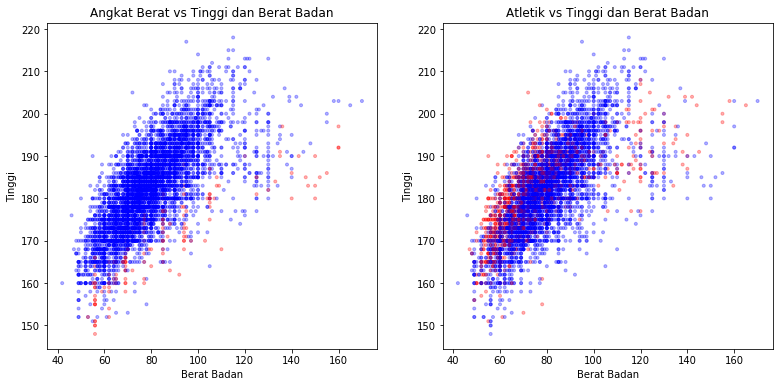

In [48]:

fig, (ax1, ax2) = plot.subplots(nrows = 1, ncols = 2, figsize = (13,6))

ax1.scatter(X['Weight'], X['Height'], c = Y['Sport[Weightlifting]'], cmap = 'bwr', marker = '.', alpha = 0.3)
ax1.set_title('Angkat Berat vs Tinggi dan Berat Badan')
ax1.set_xlabel('Berat Badan')
ax1.set_ylabel('Tinggi')

ax2.scatter(X['Weight'], X['Height'], c = Y['Sport[Athletics]'], cmap = 'bwr', marker = '.', alpha = 0.3)
ax2.set_title('Atletik vs Tinggi dan Berat Badan')
ax2.set_xlabel('Berat Badan')
ax2.set_ylabel('Tinggi')

plot.show()

Selanjutnya, melakukan prediksi atlit angkat berat

In [49]:
atlit_pria['angkat_berat'] = np.where(atlit_pria['Sport'] == 'Weightlifting', 1, 0)

In [50]:
# Membuat y dan X matrik

from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors

Y, X = dmatrices('angkat_berat ~ 0 + Weight + Height',
                data = atlit_pria,
                return_type = 'dataframe')

y = Y['angkat_berat'].values

accuracies = []

kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True).split(X, y)

model = neighbors.KNeighborsClassifier(n_neighbors = 20,
                                      p = 2,
                                      weights = 'uniform')

for train, holdout in kfold:
    model.fit(X.iloc[train], y[train])
    prediction_on_test = model.predict(X.iloc[holdout])
    accuracies.append(metrics.accuracy_score(y[holdout], prediction_on_test))

np.mean(accuracies)

0.9737159122752681

Terlihat bahwa hasil akurasi prediksi sebesar 97%, tentu saja karena cabang olahraga ini para atlitnya cenderung memiliki berat badan dan tinggi yang besar dibandingkan dengan cabang olahraga lainnya.

Selanjutnya mencoba untuk cabang Atletik

In [51]:
atlit_pria['atletik'] = np.where(atlit_pria['Sport'] == 'Athletics', 1, 0)

# create the y and X matrices
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors

Y, X = dmatrices('atletik ~ 0 + Weight + Height',
                data = atlit_pria,
                return_type = 'dataframe')

y = Y['atletik'].values

accuracies = []

kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True).split(X, y)

model = neighbors.KNeighborsClassifier(n_neighbors = 20,
                                      p = 2,
                                      weights = 'uniform')

for train, holdout in kfold:
    model.fit(X.iloc[train], y[train])
    prediction_on_test = model.predict(X.iloc[holdout])
    accuracies.append(metrics.accuracy_score(y[holdout], prediction_on_test))

np.mean(accuracies)

0.8223687202197445

Hasil yang cukup akurat dengan nilai akurasi sebesar 82% untuk memprediksi atlit Atletik